In [83]:
import os
import json
import matplotlib.pyplot as plt

from pprint import pprint
import numpy as np
import cv2

In [91]:
# paths to image files and labels
labels_dir = "./data/labels/"
images_dir = "./data/images/"
train_test_split = "./data/NewDataInfo.txt"

In [93]:
with open(train_test_split, "r") as f:
    lines = f.readlines()

train_files = []
test_files = []

for line in lines:
    filename, is_train = line.strip().split()
    if is_train == "True":
        train_files.append(filename)
    else:
        test_files.append(filename)
print("Num. of train files:", len(train_files))
print("Num. of test files:", len(test_files))

Num. of train files: 648
Num. of test files: 4


<h1><font color='red'>Data Exploring</font></h1>

Data Exploring includes understanding the label file and the distribution of labels

In [85]:
def get_distribution(labels_dir):
    """Finds the distribution of defect instances
    
    Args:
        labels_dir (str): path to labels folder
        
    Returns:
        distribution of existing defects
        list of files which do not have any defect
    """
    
    distribution = {}
    no_defect_files = []
    
    for filename in os.listdir(labels_dir):
        with open(f"{labels_dir}/{filename}", "r") as f:
            label = json.load(f)
            instances = label["shapes"]
            
            # check if there is defect or not
            if len(instances) > 0:
                # iterate found defects
                for instance in instances:
                    
                    defect_type = instance["label"]
                    points = instance["points"]
                    
                    if defect_type in distribution:
                        distribution[defect_type] += 1
                    else:
                        distribution[defect_type] = 1
            else:
                # save filenames with no defect
                no_defect_files.append(filename)

    return distribution, no_defect_files

In [86]:
defect_distribution, no_defect_files = get_distribution(labels_dir)

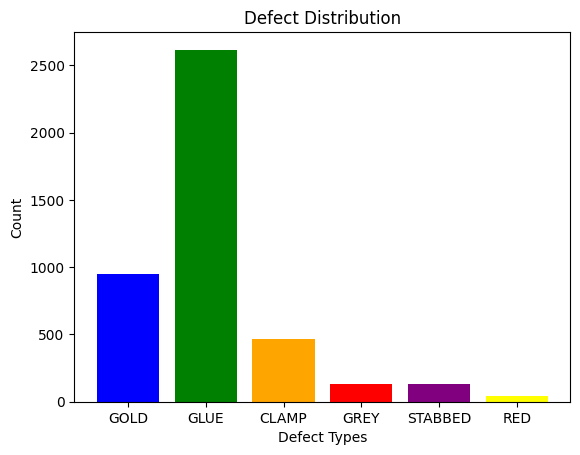

In [90]:
def plot_distribution(distribution):
    keys = distribution.keys()
    values = distribution.values()
    colors = ['blue', 'green', 'orange', 'red', 'purple', 'yellow']
    plt.bar(keys, values, color=colors)
    plt.xlabel('Defect Types')
    plt.ylabel('Count')
    plt.title('Defect Distribution')
    plt.show()

plot_distribution(defect_distribution)

<h1><font color='red'>Display Samples</font></h1>

['122011309511590_5_side2.json',
 '122012713581976_5_side2.json',
 '122012713561608_5_side2.json',
 '122012713521288_5_side2.json',
 '122012613141482_5_side2.json',
 '122012713565629_5_side2.json',
 '122012713574284_5_side2.json',
 '122012713584179_5_side2.json',
 '122012713553989_5_side2.json',
 '122012613140780_5_side2.json',
 '122012613140956_5_side2.json']

In [97]:
top_left_x = float("inf")
top_left_y = float("inf")

bottom_right_x = float("-inf")
bottom_right_y = float("-inf")

for filename in os.listdir("./wheel_data/data/"):
    if filename.endswith("json"):
        with open(f"./wheel_data/data/{filename}", "r") as f:
            label = json.load(f)
            instances = label["shapes"]
            
            # check if there is defect or not
            if len(instances) > 0:
                # iterate found defects
                for instance in instances:
                    
                    defect_type = instance["label"]
                    points = instance["points"]
                    for point in points:
                        x, y = point
                        top_left_x = min(top_left_x, x)
                        top_left_y = min(top_left_y, y)
    
                        bottom_right_x = max(bottom_right_x, x)
                        bottom_right_y = max(bottom_right_y, y)

In [98]:
top_left_x, top_left_y

(1076.0, 626.0)

In [99]:
bottom_right_x, bottom_right_y

(1557.0, 1263)